In [3]:
# Task 1. Classify Temperatures:

temperatures = [5, 6, 7, 19, 7.5, 8.5, 15, 3, 4, 10]

cold=[]
mild=[]
comfortable=[]

for i in temperatures:
  if i < 10:
    cold.append(i)
  elif 10 <= i <= 15:
    mild.append(i)
  elif 15 < i <= 20:
      comfortable.append(i)

print("The cold temperatures are: ", cold)
print("The mild temperatures are: ", mild)
print("The comfortable temperatures are: ", comfortable)

The cold temperatures are:  [5, 6, 7, 7.5, 8.5, 3, 4]
The mild temperatures are:  [15, 10]
The comfortable temperatures are:  [19]


In [6]:
# Task 2. Based on Data

temperatures = [5, 6, 7, 19, 7.5, 8.5, 15, 3, 4, 10]
cold=[]
mild=[]
comfortable=[]
for i in temperatures:
  if i < 10:
    cold.append(i)
  elif 10 <= i <= 15:
    mild.append(i)
  elif 15 < i <= 20:
      comfortable.append(i)

print("Total number of cold days was: ", len(cold))
print("Total number of mild days was: ", len(mild))
print("Total number of comforatable days was: ", len(comfortable))

Total number of cold days was:  7
Total number of mild days was:  2
Total number of comforatable days was:  1


In [7]:
# Task 3. Convert Temperatures from Celsius to Fahrenheit.

temperatures_fahrenheit = []
for i in temperatures:
  fahrenheit = (i * 9/5) + 32
  temperatures_fahrenheit.append(fahrenheit)
print("Temperatures in Fahrenheit:", temperatures_fahrenheit)

Temperatures in Fahrenheit: [41.0, 42.8, 44.6, 66.2, 45.5, 47.3, 59.0, 37.4, 39.2, 50.0]


The average day-time temperature is 12.17 °C.


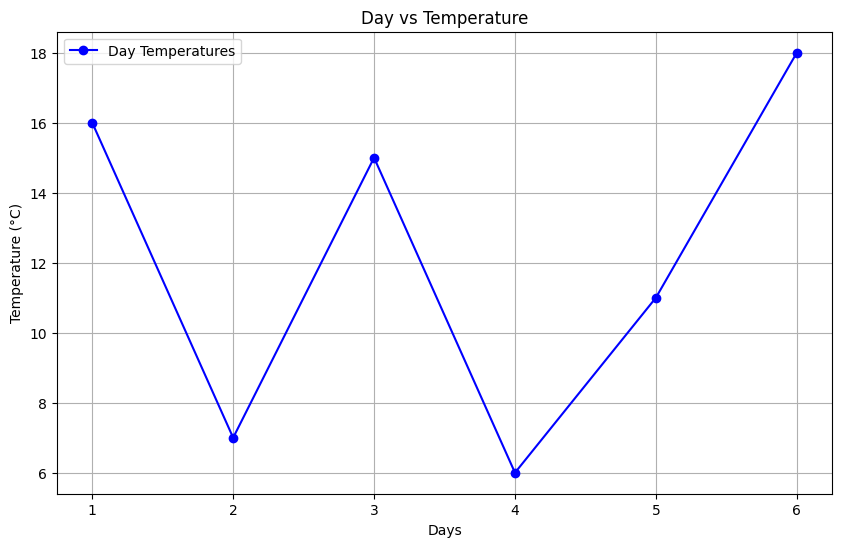

In [14]:
# Task 4. Analyze Temperature Patterns by Time of Day:

import matplotlib.pyplot as plt

temperatures = [1, 2, 16, 5, 4, 7, 8, 10, 15, 12, 17, 6, 14, 9, 11, 13, 3, 18, 20]

night= []
day= []
eve= []

for i,temp in enumerate(temperatures):
  if i%3==0:
    night.append(temp)
  elif i%3==1:
    eve.append(temp)
  else: day.append(temp)

average_day_temp= sum(day)/len(day)
print(f"The average day-time temperature is {average_day_temp:.2f} °C.")

# plot
plt.figure(figsize=(10,6))
plt.plot(range(1, len(day)+1), day, marker='o', linestyle='-', color='blue', label='Day Temperatures')
plt.title("Day vs Temperature")
plt.xlabel("Days")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()


In [16]:
# 8.1.1 : Recursion:
# Task 1. Sum of Nested Lists:

def sum_nested_list(nested_list):
  total=0
  for element in nested_list:
    if isinstance(element, list):
      total += sum_nested_list(element)
    else:
      total+=element
  return total

nested_list = [1, [2, [3, 4], 5], 6, [7, 8], [9]]
print(sum_nested_list(nested_list))

45


In [17]:
# Task 2. Generate All Permutations of a String:

def generate_permutations(s):
    if len(s) == 1:
        return [s]

    permutations = set()
    for i, char in enumerate(s):
        remaining = s[:i] + s[i+1:]
        for perm in generate_permutations(remaining):
            permutations.add(char + perm)

    return list(permutations)

print("Permutations of 'abc':", sorted(generate_permutations("abc")))
print("Permutations of 'aab':", sorted(generate_permutations("aab")))

Permutations of 'abc': ['abc', 'acb', 'bac', 'bca', 'cab', 'cba']
Permutations of 'aab': ['aab', 'aba', 'baa']


In [20]:
# Task 3. Directory Size Calculations:

def calculate_directory_size(directory):
  total_size=0
  for key, value in directory.items():
    if isinstance(value, dict):
      total_size += calculate_directory_size(value)
    else:
      total_size += value
  return total_size

dir_structure = {
    "file1.txt": 200,
    "file2.txt": 300,
    "subdir1": {
        "file3.txt": 400,
        "file4.txt": 100
    },

    "subdir2": {
        "subsubdir1": {
            "file5.txt": 250
        },
        "file6.txt": 150
    }
}
print("Total size of the directory is: ",calculate_directory_size(dir_structure),"KB")

Total size of the directory is:  1400 KB


In [23]:
# 8.2.2 : Dynamic Programming:

# Task 1. Coin Change Problem

def min_coins(coins, amount):
  dp = [float('inf')] * (amount + 1)
  dp[0] = 0

  for coin in coins:
     for x in range(coin, amount + 1):
            dp[x] = min(dp[x], dp[x - coin] + 1)

  return dp[amount] if dp[amount] != float('inf') else -1

coins = [1, 2, 5]
amount = 11
result = min_coins(coins, amount)
print(f"The minimum coins needed to make a total of {amount} is: {result}")

The minimum coins needed to make a total of 11 is: 3


In [33]:
# Task 2: Longest Common Subsequence:

def longest_common_subsequence(s1, s2):

  m, n = len(s1), len(s2)
  dp = [[0] * (n + 1) for _ in range(m + 1)]
  for i in range(1, m + 1):
        for j in range(1, n + 1):
            if s1[i - 1] == s2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

  return dp[m][n]

s1 = "abcde"
s2 = "ace"
print(f"LCS length is {longest_common_subsequence(s1, s2)}, and the LCS is '{s2}'")

LCS length is 3, and the LCS is 'ace'


In [39]:
# Task 3. Knapsack Problem:

def knapsack(weights, values, capacity):
  n = len(weights)
  dp = [[0] * (capacity + 1) for _ in range(n + 1)]

  for i in range(1, n + 1):
      for w in range(1, capacity + 1):
          if weights[i - 1] <= w:
              dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
          else:
            dp[i][w] = dp[i - 1][w]

  return dp[n][capacity]

weights = [1, 2, 4, 5]
values = [1, 3, 5, 7]
capacity = 5
print(f"The maximum possible value for the given capacity is:", knapsack(weights, values, capacity))

The maximum possible value for the given capacity is: 7
